# Previsión de Gastos Médicos

El objetivo de este notebook es predecir los gastos médicos de un conjunto de personas. Se prepararán conjunto de datos, con información de ujn grupo de mujeres y hombres, para el modelaje predictivo.
Se realizará un estudio de los datos y luego se usarán cuatro regresores para crear el mejor modelo de predicción.

In [48]:
# Imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

In [51]:
# Versiones de los paquetes usados en este notebook

%reload_ext watermark
%watermark -a "César S. Hooper/ Dic 2021" --iversions
!python --version

Author: César S. Hooper/ Dic 2021

numpy     : 1.19.5
matplotlib: 3.3.4
seaborn   : 0.11.1
pandas    : 1.2.4

Python 3.8.8


In [2]:
path = 'C:/Users/Cesar Hooper/Desktop/python/cap6/Cap06/dados/'

In [3]:
dataset = pd.read_csv(path + 'custos_seguro.csv')

In [4]:
dataset.head()

,idade,sexo,imc,filhos,fumante,regiao,custo_medico_anual
0,19,feminino,27.90,0,yes,sudeste,16884.92400
1,18,masculino,33.77,1,no,sul,1725.55230
2,28,masculino,33.00,3,no,sul,4449.46200
3,33,masculino,NaN,0,no,nordeste,21984.47061
4,32,masculino,28.88,0,no,nordeste,3866.85520


In [5]:
dataset.shape

(1338, 7)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   idade               1338 non-null   int64  
 1   sexo                1338 non-null   object 
 2   imc                 1325 non-null   float64
 3   filhos              1338 non-null   int64  
 4   fumante             1338 non-null   object 
 5   regiao              1338 non-null   object 
 6   custo_medico_anual  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# datos perdidos
dataset.isnull().sum()

idade                  0
sexo                   0
imc                   13
filhos                 0
fumante                0
regiao                 0
custo_medico_anual     0
dtype: int64

In [8]:
dataset_imc = dataset['imc']

In [9]:
mean_imc = dataset_imc.mean()
dataset_imc = np.where(dataset_imc.isnull()==True, mean_imc, dataset_imc)

In [10]:
dataset['imc'] = dataset_imc

In [11]:
dataset.head()

,idade,sexo,imc,filhos,fumante,regiao,custo_medico_anual
0,19,feminino,27.900000,0,yes,sudeste,16884.92400
1,18,masculino,33.770000,1,no,sul,1725.55230
2,28,masculino,33.000000,3,no,sul,4449.46200
3,33,masculino,30.693019,0,no,nordeste,21984.47061
4,32,masculino,28.880000,0,no,nordeste,3866.85520


In [12]:
dataset.isnull().sum()

idade                 0
sexo                  0
imc                   0
filhos                0
fumante               0
regiao                0
custo_medico_anual    0
dtype: int64

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   idade               1338 non-null   int64  
 1   sexo                1338 non-null   object 
 2   imc                 1338 non-null   float64
 3   filhos              1338 non-null   int64  
 4   fumante             1338 non-null   object 
 5   regiao              1338 non-null   object 
 6   custo_medico_anual  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [14]:
# convierte todas las variables a dtype=int64 para calcular correlaciones
dataset_transformado = dataset.apply(LabelEncoder().fit_transform)

In [15]:
dataset_transformado.head()

,idade,sexo,imc,filhos,fumante,regiao,custo_medico_anual
0,1,0,197,0,1,2,1005
1,0,1,351,1,0,3,57
2,10,1,332,3,0,3,306
3,15,1,272,0,0,0,1097
4,14,1,223,0,0,0,254


In [16]:
dataset_transformado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   idade               1338 non-null   int64
 1   sexo                1338 non-null   int32
 2   imc                 1338 non-null   int64
 3   filhos              1338 non-null   int64
 4   fumante             1338 non-null   int32
 5   regiao              1338 non-null   int32
 6   custo_medico_anual  1338 non-null   int64
dtypes: int32(3), int64(4)
memory usage: 57.6 KB


### Las variables que tienen mayor correlación con el gasto médico anual

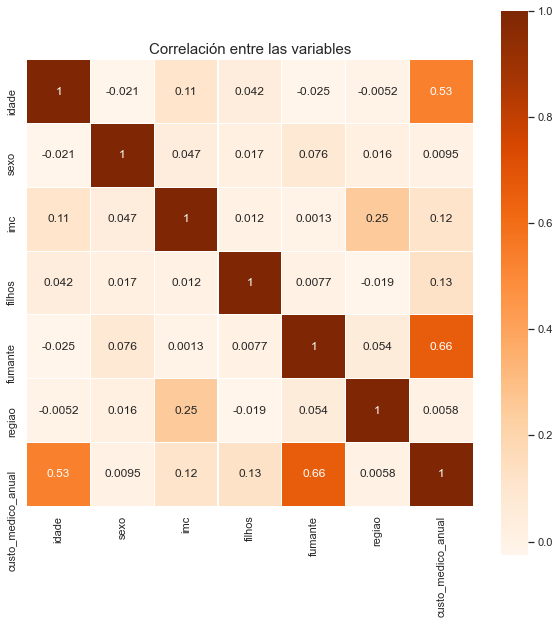

In [20]:
# usaremos heatmap para graficar la correlación cruzada entre las variables
sns.set(color_codes = True)
plt.figure(figsize = (10, 10))


sns.heatmap(dataset_transformado.astype(float).corr(), 
            linewidths = 0.1, 
            square = True, 
            linecolor = 'white', 
            annot = True,
            cmap = "Oranges")

plt.title('Correlación entre las variables', fontsize=15)
plt.show()

Se observa que, de acuerdo con los datos, la edad y el tabaquismo son las variables que más afectan el costo médico. Le siguen a desde lejos la cantiad de hijos y el IMC. 

### Costo por género


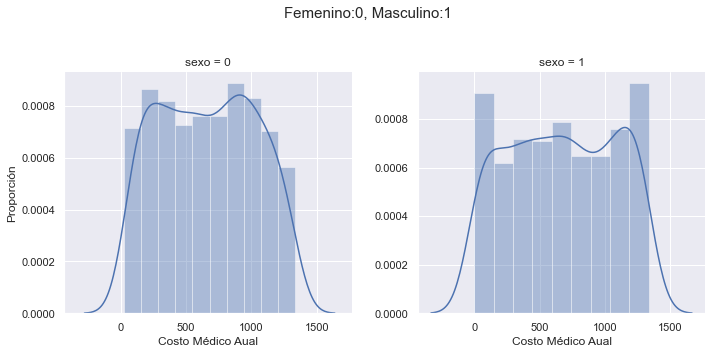

In [18]:
# veremos los costos por sexo
# femenino: 0, masculino:1
grafico=sns.FacetGrid(dataset_transformado, col='sexo', height=5, sharey = False, sharex = True)
grafico.map(sns.distplot, 'custo_medico_anual', color='b')
grafico.set_axis_labels('Costo Médico Aual', 'Proporción')
grafico.fig.subplots_adjust(top=.8)
grafico.fig.suptitle('Femenino:0, Masculino:1', fontsize=15)
plt.show()

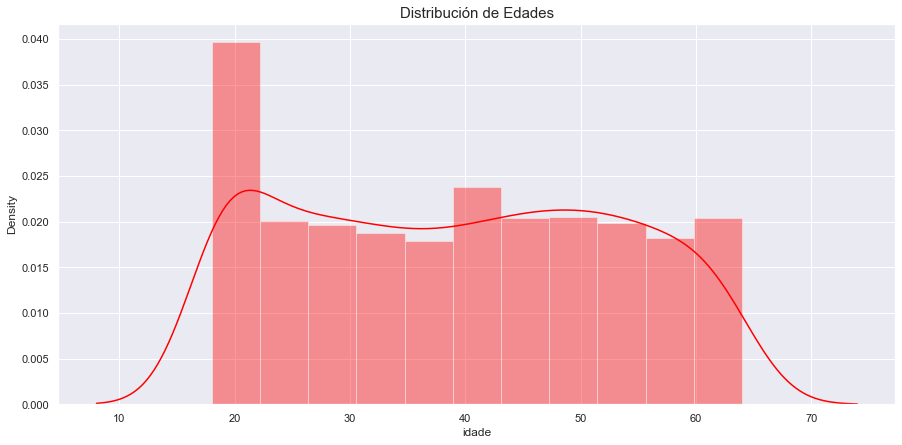

In [25]:
# El siguiente gráfico está la distribucón de edades para ambos sexos. 
plt.figure(figsize = (15,7))
plt.title("Distribución de Edades", fontsize=15)
ax = sns.distplot(dataset["idade"], color = 'red')

In [32]:
# Separamos el dataframe por sexos
dataset_f = dataset[dataset['sexo']=='feminino']
dataset_m = dataset[dataset['sexo']=='masculino']
print(dataset_f.shape, dataset_m.shape)

(662, 7) (676, 7)


In [27]:
# cálculo del gasto promedio anual de hombres y mujeres por franja etárea
# Estas son las franjas de edades que usaremos a continuación

edades = [[17, 29], [30, 41], [42, 52], [53, 65]]
gastos_mujeres = []
for edad in edades:
    
    df_tmp = dataset_f.loc[dataset_f['idade']>=edad[0]]
    df_fnl = df_tmp[df_tmp['idade']<=edad[1]]
    
    gastos_mujeres.append(np.floor(df_fnl['custo_medico_anual'].mean()))

gastos_hombres = []
for edad in edades:
    
    df_tmp = dataset_m.loc[dataset_m['idade']>=edad[0]]
    df_fnl = df_tmp[df_tmp['idade']<=edad[1]]
    gastos_hombres.append(np.floor(df_fnl['custo_medico_anual'].mean()))

In [28]:
# calculo de la candidad de hombres y mujeres por faja etária
edades = [[17, 29], [30, 41], [42, 52], [53, 65]]

cant_mujeres = []
for edad in edades:
    df_temp = dataset_f.loc[dataset_f['idade']>=edad[0]]
    df_final = df_temp[df_temp['idade']<=edad[1]]
    cant_mujeres.append(100*len(df_final)/len(dataset_f))

cant_hombres = []
for edad in edades:
    df_temp = dataset_m.loc[dataset_m['idade']>=edad[0]]
    df_final = df_temp[df_temp['idade']<=edad[1]]
    cant_hombres.append(100*len(df_final)/len(dataset_m))

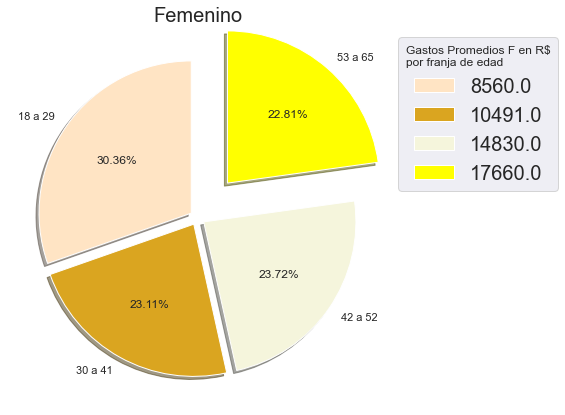

In [29]:
# Gráfico de pizza para mujeres de distribución de edad y gastos médicos promedios
explode = np.array([0.05, 0.05, 0.05, 0.3])
plt.figure(figsize=(7,7))
colores = ( "bisque", "goldenrod", "beige", 'yellow' )

p, tx, autotexts = plt.pie(cant_mujeres, labels = ['18 a 29', '30 a 41', '42 a 52', '53 a 65'], 
                          autopct = " ",
                          colors = colores, 
                          explode = explode, 
                          shadow = True, 
                          startangle = 90,
                          )
titulo = 'Gastos Promedios en R$' + '\n' + 'por franja de edad'
plt.legend(title=titulo, 
           labels=gastos_mujeres, 
           loc="upper left",
           bbox_to_anchor =(1, 0, 0.5, 1),
           fontsize=20) 

for i, a in enumerate(autotexts):
    a.set_text("{:0.2f}%".format(cant_mujeres[i]))

    
plt.title('Femenino', fontsize=20)
plt.show()



Las mujeres mayores de 53 años son las que tienen, en promedio, mayores gastos médicos anuales.

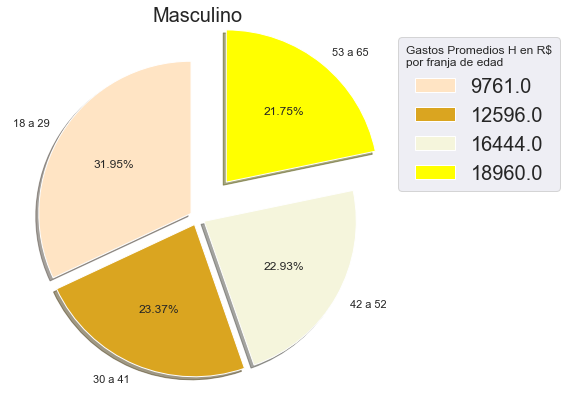

In [30]:
# Gráfico de pizza para hombres de distribución de edad y gastos médicos
explode = np.array([0.05, 0.05, 0.05, 0.3])
plt.figure(figsize=(7,7))
colores = ( "bisque", "goldenrod", "beige", 'yellow' )

p, tx, autotexts = plt.pie(cant_hombres, labels = ['18 a 29', '30 a 41', '42 a 52', '53 a 65'], 
                          autopct = " ",
                          colors = colores, 
                          explode = explode, 
                          shadow = True, 
                          startangle = 90)

titulo = 'Gastos Promedios H en R$' + '\n' + 'por franja de edad'
plt.legend(title= titulo, 
           labels=gastos_hombres, 
           loc=2,
           bbox_to_anchor =(1, 0, 0.5, 1),
           fontsize=20)

for i, a in enumerate(autotexts):
    a.set_text("{:0.2f}%".format(cant_hombres[i]))



plt.title('Masculino', fontsize=20)
plt.show()

Al igual que las mujeres, los hombres mayores de 53 años tienen, en promedio, mayores gastos médicos anuales. 

### Proporción de fumadores por sexo

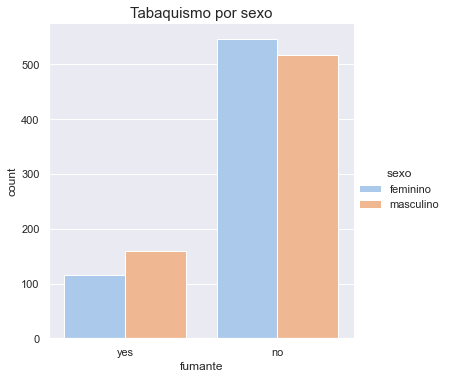

In [34]:
# Quiénes fuman más?? Hombres o mujeres?
# Solución gráfica
sns.catplot(x = "fumante", kind = "count", hue = 'sexo', data = dataset, palette = 'pastel');
plt.title('Tabaquismo por sexo', fontsize=15)
plt.show()

### Gráfico de la evolución de costos médicos con la edad. Diferencia entre fumadores y no fumadores

<Figure size 1440x576 with 0 Axes>

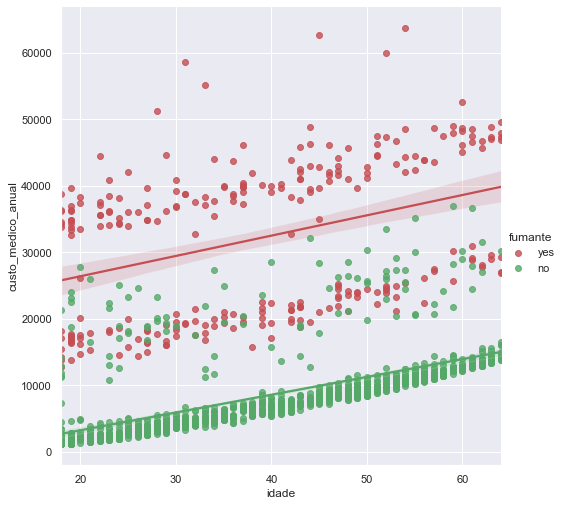

In [38]:
# Solução com Seaborn e Regressão Linear
plt.figure(figsize=(20,8))
sns.lmplot(x = "idade", y = "custo_medico_anual", hue = "fumante", data = dataset, palette = dict(yes = "r", no = "g"), height = 7)
plt.show()

## Construcción del modelo predictivo

In [39]:
dataset = pd.get_dummies(dataset)
dataset.head()

,idade,imc,filhos,custo_medico_anual,sexo_feminino,sexo_masculino,fumante_no,fumante_yes,regiao_nordeste,regiao_norte,regiao_sudeste,regiao_sul
0,19,27.900000,0,16884.92400,1,0,0,1,0,0,1,0
1,18,33.770000,1,1725.55230,0,1,1,0,0,0,0,1
2,28,33.000000,3,4449.46200,0,1,1,0,0,0,0,1
3,33,30.693019,0,21984.47061,0,1,1,0,1,0,0,0
4,32,28.880000,0,3866.85520,0,1,1,0,1,0,0,0


In [40]:
X = dataset.drop(columns = ['custo_medico_anual'])
y = dataset['custo_medico_anual']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [42]:
def reporte_metricas(y_train, y_test, y_train_pred, y_test_pred):
    '''Función que reporta las métricas'''
    # mean squared error
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    
    # root mean squared error
    rmse_train = np.sqrt(np.absolute(mse_train))
    rmse_test = np.sqrt(np.absolute(mse_test))
     
    # coeficiente R2
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    return print('RMSE train %.2f'%rmse_train, '\n',
                'RMSE test %.2f'%rmse_test, '\n',
                'R2 train %.2f'%r2_train, '\n', 
                'R2 test %.2f'%r2_test)

In [43]:
# creación del modelo Linear regression
lr = LinearRegression().fit(X_train, y_train)
lr_train_pred = lr.predict(X_train)
lr_test_pred = lr.predict(X_test)

# Reporte de Métricas
reporte_metricas(y_train, y_test, lr_train_pred, lr_test_pred)

RMSE train 6075.76 
 RMSE test 5709.96 
 R2 train 0.75 
 R2 test 0.76


In [44]:
# Random forest

rfr = RandomForestRegressor(n_estimators = 50).fit(X_train, y_train)
rfr_train_pred = rfr.predict(X_train)
rfr_test_pred = rfr.predict(X_test)

# Reporte de Métricas
reporte_metricas(y_train, y_test, rfr_train_pred, rfr_test_pred)

RMSE train 1904.00 
 RMSE test 5036.77 
 R2 train 0.98 
 R2 test 0.82


In [45]:
# Gradient boosting regressor
gbr = GradientBoostingRegressor(n_estimators=300, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
gbr_train_pred = gbr.predict(X_train)
gbr_test_pred = gbr.predict(X_test)

# Reporte de Métricas
reporte_metricas(y_train, y_test, gbr_train_pred, gbr_test_pred)

RMSE train 5530.78 
 RMSE test 6216.82 
 R2 train 0.79 
 R2 test 0.72


In [46]:
# Extra Gradient boosting regressor
xgbr = XGBRegressor().fit(X_train, y_train)
xgbr_train_pred = xgbr.predict(X_train)
xgbr_test_pred = xgbr.predict(X_test)

# reporte de métricas
reporte_metricas(y_train, y_test, xgbr_train_pred, xgbr_test_pred)

RMSE train 984.70 
 RMSE test 5312.47 
 R2 train 0.99 
 R2 test 0.80


Los modelos que predicen mejor son Random Forest y XGBR

# FIN